## Sampling

In [1]:
import numpy as np
import pandas as pd
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [2]:
df_sample['type'] = df_sample['type'].replace({'CASH_OUT': 0, 'CASH_IN': 1, 'PAYMENT': 2, 'TRANSFER': 3, 'DEBIT': 4})

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameDest'])
label
df_sample.drop("nameDest", axis=1, inplace=True)
df_sample["nameDest"] = label

le = LabelEncoder()
label = le.fit_transform(df_sample['nameOrig'])
label
df_sample.drop("nameOrig", axis=1, inplace=True)
df_sample["nameOrig"] = label

In [4]:
X = df_sample.drop('isFraud', axis=1)
# Separate the target variable
y = df_sample['isFraud']

In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Upsampling via SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=0)

#Downsample via RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.9, random_state=0)

#Application of the resampling methods
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [6]:
reverse_map = {0: 'CASH_OUT', 1: 'CASH_IN', 2: 'PAYMENT', 3: 'TRANSFER', 4: 'DEBIT'}
df_sample['type'] = df_sample['type'].replace(reverse_map)

In [7]:
combined_data = pd.concat([X_resampled, y_resampled], axis=1)

In [8]:
X1 = combined_data.drop('isFraud', axis=1)
# Separate the target variable
y1 = combined_data['isFraud']

In [9]:
from sklearn.model_selection import train_test_split

# Print class distribution before split
print(y.value_counts(normalize=True))

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X1, y1 , test_size=0.1, stratify=y1, random_state=2)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.526316
1    0.473684
Name: isFraud, dtype: float64
0    0.526311
1    0.473689
Name: isFraud, dtype: float64


In [10]:
analysis_data = pd.concat([X_train, y_train], axis=1)

In [11]:
test_data = pd.concat([X_test, y_test], axis=1)

In [12]:
analysis_data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest,nameOrig,isFraud
4172,20,0,183966.880000,0.000000,0.00,7.708426e+06,7.892392e+06,0,186687,376570,0
236619,439,0,27086.074194,27086.074194,0.00,2.226592e+04,4.263867e+04,0,21458,516313,1
336307,74,2,136186.286791,136186.286791,0.00,0.000000e+00,4.111678e+03,0,93305,141995,1
182307,372,0,58708.550000,10806.000000,0.00,2.869893e+06,2.928602e+06,0,60006,499637,0
350800,37,0,28862.406017,28862.406017,0.00,0.000000e+00,2.886241e+04,0,199837,404290,1
...,...,...,...,...,...,...,...,...,...,...,...
392105,526,0,942264.547151,942264.547151,0.00,1.424116e+06,2.366380e+06,0,210485,156578,1
407615,309,0,63962.820836,63962.820836,0.00,1.497455e+06,1.561418e+06,0,97196,217352,1
411737,433,3,179493.274518,179493.274518,0.00,0.000000e+00,0.000000e+00,0,206132,605979,1
15487,236,3,168090.040000,0.000000,0.00,9.346362e+05,1.102726e+06,0,108523,227720,0


In [26]:
# Find min and max values of "step" column
step_min = test_data['step'].min()
step_max = test_data['step'].max()
# Print the results
print("Minimum step value:", step_min)
print("Maximum step value:", step_max)

Minimum step value: 1
Maximum step value: 739


In [14]:
reverse_map = {0: 'CASH_OUT', 1: 'CASH_IN', 2: 'PAYMENT', 3: 'TRANSFER', 4: 'DEBIT'}
analysis_data['type'] = analysis_data['type'].replace(reverse_map)
test_data['type'] = test_data['type'].replace(reverse_map)

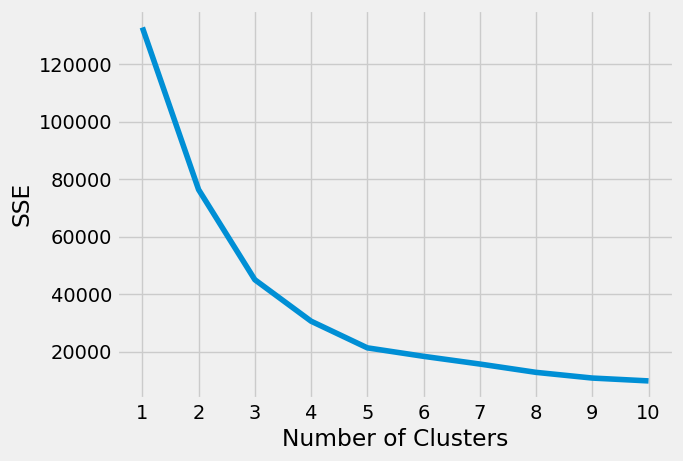

In [38]:
from sklearn.cluster import KMeans

# This code transforms the continuous variables (step and amount) taking into account ‘isFraud Class’ which is the objective  
# of this research. A k-means cluster model with 3 features, ‘isFraud’, ‘step’ and ‘amount’ is used.
# The variables ‘step_cluster’ and ‘amount_cluster’ are created for every single transaction.

continuous_vars = ['step','amount','isFraud']

# Normalizing the data
normalized_df = (test_data[continuous_vars] - test_data[continuous_vars].mean()) / test_data[continuous_vars].std()

# Determining the optimal number of clusters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 50, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(normalized_df)
    sse.append(kmeans.inertia_)
    
# Application of th elbow method 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Application of K-Means clustering
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(normalized_df)
clusters = kmeans.predict(normalized_df)

# Using K-Means clustering to create clusters for the continuous variables "step", "amount" while taking "isFraud" into consideration
cluster_df = pd.DataFrame()
for var in continuous_vars:
    cluster_centers = kmeans.cluster_centers_[:, continuous_vars.index(var)]
    col_name = var + '_cluster'
    cluster_df[col_name] = kmeans.predict(normalized_df)
    
    # Replace cluster labels with desired values
    
    if var == 'isFraud':
        cluster_df[col_name] = cluster_df[col_name].apply(lambda x: 'Fraud' if x == 1 else 'No_Fraud')
  
    elif var == 'amount':
        bin_edges = [1, 50000, 100000, 500000, 1000000, 5000000, 10000000, 42000000]
        cluster_labels = ['5-50k', '50k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-42M']
        bin_edges_test = [test_data['amount'].min()-1] + bin_edges[1:-1] + [test_data['amount'].max()+1]
        cluster_df[col_name] = pd.cut(test_data['amount'], bins=bin_edges_test, labels=cluster_labels)

    elif var == 'step':
        bin_edges = [1, 186, 372, 558, np.inf]
        cluster_labels = ['1-185', '186-371', '372-557', '558-739']
        cluster_df[col_name] = pd.cut(test_data['step'], bins=bin_edges, labels=cluster_labels)


# Create new dataframe to store the converted values
K_means_df_test = pd.DataFrame()
K_means_df_test = pd.concat([K_means_df_test, cluster_df], axis=1)

In [39]:
K_means_df_test.head(100)

,step_cluster,amount_cluster,isFraud_cluster
0,NaN,NaN,No_Fraud
1,NaN,NaN,No_Fraud
2,NaN,NaN,Fraud
3,NaN,NaN,Fraud
4,NaN,NaN,No_Fraud
...,...,...,...
95,1-185,100k-500k,No_Fraud
96,NaN,NaN,Fraud
97,NaN,NaN,Fraud
98,NaN,NaN,Fraud


In [36]:
test_data['step'].isnull().sum()

0

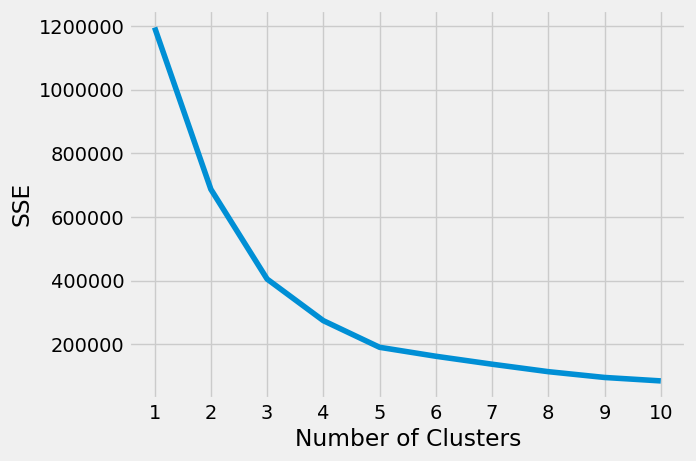

The bin edges for step are [1, 186, 372, 558, 743]
The bin edges for amount are [0, 50000, 100000, 500000, 1000000, 5000000, 10000000, 60000000, 65000000]


In [17]:
from sklearn.cluster import KMeans

# This code transforms the continuous variables (step and amount) taking into account ‘isFraud Class’ which is the objective  
# of this research. A k-means cluster model with 3 features, ‘isFraud’, ‘step’ and ‘amount’ is used.
# The variables ‘step_cluster’ and ‘amount_cluster’ are created for every single transaction.

continuous_vars = ['step','amount','isFraud']

# Normalizing the data
normalized_df = (analysis_data[continuous_vars] - analysis_data [continuous_vars].mean()) / analysis_data [continuous_vars].std()

# Determining the optimal number of clusters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 50, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(normalized_df)
    sse.append(kmeans.inertia_)
    
# Application of th elbow method 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Application of K-Means clustering
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(normalized_df)
clusters = kmeans.predict(normalized_df)

# Using K-Means clustering to create clusters for the continuous variables "step", "amount" while taking "isFraud" into consideration
cluster_df = pd.DataFrame()
for var in continuous_vars:
    cluster_centers = kmeans.cluster_centers_[:, continuous_vars.index(var)]
    col_name = var + '_cluster'
    cluster_df[col_name] = kmeans.predict(normalized_df)
    
    # Replace cluster labels with desired values
    
    if var == 'isFraud':
        cluster_df[col_name] = cluster_df[col_name].apply(lambda x: 'Fraud' if x == 1 else 'No_Fraud')
  
    elif var=='amount':
        bin_edges = [0, 50000, 100000, 500000, 1000000, 5000000, 10000000, 60000000, 65000000]
        cluster_labels = ['0-50k', '50k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-60M', '60M-65M']
        cluster_df[col_name] = pd.cut(analysis_data['amount'], bins=bin_edges, labels=cluster_labels)
        print(f"The bin edges for amount are {bin_edges}")
   
    elif var == 'step':
        bin_edges = [1, 186, 372, 558, 743] 
        cluster_labels = ['1-186', '187-372', '373-558', '559-743']
        cluster_df[col_name] = pd.cut(analysis_data ['step'], bins=bin_edges, labels=cluster_labels)
        print(f"The bin edges for step are {bin_edges}")

# Create new dataframe to store the converted values
K_means_df = pd.DataFrame()
K_means_df = pd.concat([K_means_df, cluster_df], axis=1)

In [18]:
K_means_df= pd.concat([analysis_data['type'].reset_index(drop=True), K_means_df], axis=1)

In [19]:
K_means_df_test= pd.concat([test_data['type'].reset_index(drop=True), K_means_df_test], axis=1)

In [20]:
K_means_df

,type,step_cluster,amount_cluster,isFraud_cluster
0,CASH_OUT,1-186,0-50k,Fraud
1,CASH_OUT,187-372,0-50k,No_Fraud
2,PAYMENT,373-558,0-50k,No_Fraud
3,CASH_OUT,187-372,0-50k,Fraud
4,CASH_OUT,187-372,0-50k,No_Fraud
...,...,...,...,...
398493,CASH_OUT,373-558,100k-500k,No_Fraud
398494,CASH_OUT,559-743,100k-500k,No_Fraud
398495,TRANSFER,187-372,1M-5M,No_Fraud
398496,TRANSFER,373-558,5M-10M,Fraud


In [21]:
K_means_df_test

,type,step_cluster,amount_cluster,isFraud_cluster
0,CASH_OUT,NaN,NaN,No_Fraud
1,CASH_OUT,NaN,NaN,No_Fraud
2,TRANSFER,NaN,NaN,Fraud
3,CASH_OUT,NaN,NaN,Fraud
4,TRANSFER,NaN,NaN,No_Fraud
...,...,...,...,...
44273,PAYMENT,NaN,NaN,Fraud
44274,CASH_OUT,NaN,NaN,Fraud
44275,CASH_OUT,NaN,NaN,Fraud
44276,CASH_IN,NaN,NaN,Fraud


In [ ]:
# Change data types to object
K_means_df = K_means_df .astype('object')

# Check the data types of columns after conversion
print(K_means_df .dtypes)

In [ ]:
# Change data types to object
K_means_df_test = K_means_df_test .astype('object')

# Check the data types of columns after conversion
print(K_means_df_test .dtypes)

In [ ]:
from chefboost import Chefboost as chef
import pandas as pd

config = {'algorithm': 'CHAID','min_samples_split': 2,'learning_rate':0.012,'enableParallelism': False}
model = chef.fit(K_means_df, config = config, target_label = 'isFraud_cluster')
print(model)

In [ ]:
# drop the last column and create a new DataFrame
df_test = K_means_df_test.iloc[:, :-1].reset_index(drop=True)

In [ ]:
df_test

In [ ]:
test_target = [['isFraud_cluster']]

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained a `chef` model
predictions = chef.predict(model,K_means_df_test)

# Generate classification report
report = classification_report(y_test, predictions)
print(report)

## Apriori algorithm

In [ ]:
import pandas as pd

# Convert the categorical columns to boolean values 
df_bool = pd.get_dummies(K_means_df, columns=['type','step_cluster', 'amount_cluster', 'isFraud_cluster'], dtype=bool).astype(int)

# Replace False with 0 and True with 1
df_bool = df_bool.replace({False: 0, True: 1})

# Save the transformed dataset
df_bool.to_csv('fraud_dataset_binary1.csv', index=False)

In [ ]:
df_bool

In [ ]:
counts = K_means_df['isFraud_cluster'].value_counts()
counts

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_bool, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.05)

pd.options.display.max_colwidth = None

# Filter rules that include isFraud_cluster_Fraud in either antecedents or consequents
rules_with_fraud = rules[
    (rules["consequents"].astype(str).str.contains("isFraud_cluster_Fraud"))
]

# Print the filtered rules
for index, row in rules_with_fraud.iterrows():
    print(row.to_string())
    print("\n")

print(f"Total number of rules: {len(rules)}")

# Decrease the font size of the output
from IPython.core.display import HTML
HTML("<style>.output {font-size: 14px;}</style>")

In [ ]:
import itertools
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# # Generate frequent itemsets using the Apriori algorithm
# frequent_itemsets = apriori(df_bool, min_support=0.1, use_colnames=True)

# # Generate association rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)

# # Filter rules that include isFraud_cluster_Fraud in the consequents
# rules_with_fraud = rules[
#     (rules["consequents"].astype(str).str.contains("isFraud_cluster_Fraud"))
# ]

# Define a function to check if a rule is a super antecedent of another rule
def is_super_antecedent_rule(rule1, rule2):
    if set(rule1["antecedents"]).issubset(set(rule2["antecedents"])):
        return True
    return False

# Define a function to find all possible sub-antecedents for a given set of items
def find_all_combinations(items):
    combinations = []
    for i in range(1, len(items)):
        combs = itertools.combinations(items, i)
        combinations += [tuple(c) for c in combs]
    return combinations

final_rules = []
for i, rule in rules_with_fraud.iterrows():
    all_combinations = find_all_combinations(rule["antecedents"])
    is_super = False
    for j, r in rules_with_fraud.iterrows():
        if i == j:
            continue
        if is_super_antecedent_rule(rule, r):
            if set(r["antecedents"]).issubset(set(all_combinations)):
                is_super = True
                break
    if not is_super:
        final_rules.append(rule)

# Print the non-redundant rules and their count
print(f"Number of non-redundant rules: {len(final_rules)}")
for i, rule in enumerate(final_rules):
    print(f"Rule {i+1}:")
    print(f"\tAntecedents: {set(rule['antecedents'])}")
    print(f"\tConsequents: {set(rule['consequents'])}")
    print(f"\tSupport: {rule['support']}")
    print(f"\tConfidence: {rule['confidence']}")
    print(f"\tLift: {rule['lift']}")